In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Keras
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras import layers
from functools import partial

Using TensorFlow backend.


In [2]:
DATADIR = "D:/DU_Bootcamp/artwork_styles/binary"
CATEGORIES = ["paintings", "photos"]
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category) 
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
#         plt.imshow(img_array, cmap="gray")
#         plt.show()
#         break
#     break

In [3]:
img_size = 120

In [4]:
# training_data = []
new_data = []
counter = 1

def create_new_data():
    counter = 1
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to art categories
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            while len(new_data) < 2000 * counter:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #
                    new_array = cv2.resize(img_array, (img_size, img_size))
                    new_data.append([new_array, class_num])
                    print("this one worked")
                except Exception as e:
                    print("Something went wrong")
        counter+= 1
create_new_data()

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one worked
this one

In [5]:
import random

In [6]:
# random.shuffle(training_data)
random.shuffle(new_data)

In [7]:
# print(len(training_data))
print(len(new_data))

4000


In [14]:
training_data[0:10]

[[array([[[ 83,  84,  81],
          [ 92,  90,  89],
          [ 86,  84,  83],
          ...,
          [100,  94,  89],
          [ 85,  84,  75],
          [ 89,  87,  86]],
  
         [[ 95,  93,  92],
          [ 98,  95,  93],
          [100, 100,  98],
          ...,
          [100,  99,  95],
          [ 93,  96,  87],
          [ 96,  91,  91]],
  
         [[ 87,  83,  82],
          [ 96,  91,  89],
          [108, 107, 106],
          ...,
          [ 98, 101,  99],
          [ 89,  87,  81],
          [ 88,  88,  87]],
  
         ...,
  
         [[ 45,  47,  52],
          [ 24,  28,  29],
          [ 92,  96, 100],
          ...,
          [133, 139, 144],
          [117, 124, 127],
          [ 67,  79,  91]],
  
         [[ 48,  52,  55],
          [ 53,  52,  52],
          [112, 118, 116],
          ...,
          [114, 123, 131],
          [108, 113, 124],
          [ 26,  40,  52]],
  
         [[ 56,  59,  63],
          [ 91,  96, 103],
          [127, 130, 128

In [11]:
data_subset = training_data[0:2000]

In [8]:
X = []
y = []


for features, label in new_data:
    X.append(features)
    y.append(label)

# for features, label in training_data:
#     X.append(features)
#     y.append(label)

# for features, label in data_subset:
#     X.append(features)
#     y.append(label)


In [9]:
len(X)

4000

In [10]:
len(y)

4000

In [11]:
print(np.unique(y))

[0 1]


In [12]:
from collections import Counter

Counter(y).keys()


dict_keys([1, 0])

In [13]:
Counter(y).values()

dict_values([2000, 2000])

In [14]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [15]:
X.shape

(4000, 120, 120, 3)

In [16]:
(trainX, testX, trainY, testY) = train_test_split(X, y)

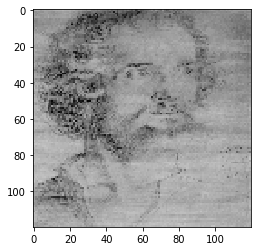

In [17]:
plt.imshow(trainX[1455,:,:], cmap=plt.cm.jet)

In [18]:
# Make labels categorical
num_classes = 2
trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)

In [19]:
trainY

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [20]:
img_rows, img_cols = img_size, img_size
input_shape = (img_rows, img_cols, 3)

In [21]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation="relu"))
cnn1.add(Dense(2, activation="softmax"))

cnn1.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
history1 = cnn1.fit(trainX, trainY, validation_data=(testX, testY),
         #batch_size=250,
        # verbose=1,
         epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - ETA: 2:06 - loss: 9.2817 - acc: 0.375 - ETA: 1:17 - loss: 8.1667 - acc: 0.468 - ETA: 1:01 - loss: 8.2987 - acc: 0.468 - ETA: 52s - loss: 7.9869 - acc: 0.492 - ETA: 47s - loss: 7.3969 - acc: 0.53 - ETA: 44s - loss: 7.6752 - acc: 0.51 - ETA: 41s - loss: 8.0898 - acc: 0.49 - ETA: 39s - loss: 8.0230 - acc: 0.49 - ETA: 37s - loss: 7.9151 - acc: 0.50 - ETA: 36s - loss: 8.1309 - acc: 0.49 - ETA: 34s - loss: 8.0786 - acc: 0.49 - ETA: 33s - loss: 7.9930 - acc: 0.50 - ETA: 33s - loss: 7.9981 - acc: 0.50 - ETA: 32s - loss: 8.0744 - acc: 0.49 - ETA: 31s - loss: 8.1741 - acc: 0.48 - ETA: 30s - loss: 8.0725 - acc: 0.49 - ETA: 30s - loss: 8.0421 - acc: 0.49 - ETA: 29s - loss: 8.0150 - acc: 0.50 - ETA: 28s - loss: 8.2029 - acc: 0.48 - ETA: 28s - loss: 8.1705 - acc: 0.49 - ETA: 27s - loss: 8.1892 - acc: 0.48 - ETA: 27s - loss: 8.2978 - acc: 0.48 - ETA: 

3000/3000 [==============================] - ETA: 32s - loss: 4.0295 - acc: 0.75 - ETA: 31s - loss: 6.2961 - acc: 0.60 - ETA: 31s - loss: 7.3875 - acc: 0.54 - ETA: 30s - loss: 7.1776 - acc: 0.55 - ETA: 29s - loss: 7.5554 - acc: 0.53 - ETA: 29s - loss: 7.8072 - acc: 0.51 - ETA: 29s - loss: 7.5554 - acc: 0.53 - ETA: 28s - loss: 7.4294 - acc: 0.53 - ETA: 28s - loss: 7.6113 - acc: 0.52 - ETA: 27s - loss: 7.5050 - acc: 0.53 - ETA: 27s - loss: 7.6927 - acc: 0.52 - ETA: 27s - loss: 7.8072 - acc: 0.51 - ETA: 26s - loss: 7.9428 - acc: 0.50 - ETA: 26s - loss: 8.0590 - acc: 0.50 - ETA: 26s - loss: 8.1262 - acc: 0.49 - ETA: 25s - loss: 8.2165 - acc: 0.49 - ETA: 25s - loss: 8.2664 - acc: 0.48 - ETA: 25s - loss: 8.3109 - acc: 0.48 - ETA: 24s - loss: 8.1916 - acc: 0.49 - ETA: 24s - loss: 8.2605 - acc: 0.48 - ETA: 24s - loss: 8.2989 - acc: 0.48 - ETA: 23s - loss: 8.3796 - acc: 0.48 - ETA: 23s - loss: 8.4094 - acc: 0.47 - ETA: 23s - loss: 8.2899 - acc: 0.48 - ETA: 22s - loss: 8.3210 - acc: 0.48 - ETA: 

3000/3000 [==============================] - ETA: 30s - loss: 8.5627 - acc: 0.46 - ETA: 30s - loss: 7.8072 - acc: 0.51 - ETA: 29s - loss: 7.3875 - acc: 0.54 - ETA: 29s - loss: 7.8072 - acc: 0.51 - ETA: 28s - loss: 7.8576 - acc: 0.51 - ETA: 28s - loss: 7.9751 - acc: 0.50 - ETA: 28s - loss: 8.2030 - acc: 0.49 - ETA: 27s - loss: 7.9331 - acc: 0.50 - ETA: 27s - loss: 8.2269 - acc: 0.48 - ETA: 27s - loss: 8.2605 - acc: 0.48 - ETA: 27s - loss: 8.2422 - acc: 0.48 - ETA: 26s - loss: 8.3948 - acc: 0.47 - ETA: 26s - loss: 8.2915 - acc: 0.48 - ETA: 26s - loss: 8.2030 - acc: 0.49 - ETA: 25s - loss: 8.0590 - acc: 0.50 - ETA: 25s - loss: 8.2165 - acc: 0.49 - ETA: 25s - loss: 8.2368 - acc: 0.48 - ETA: 24s - loss: 8.0870 - acc: 0.49 - ETA: 24s - loss: 8.1651 - acc: 0.49 - ETA: 24s - loss: 8.1850 - acc: 0.49 - ETA: 23s - loss: 8.1550 - acc: 0.49 - ETA: 23s - loss: 8.2651 - acc: 0.48 - ETA: 23s - loss: 8.2999 - acc: 0.48 - ETA: 22s - loss: 8.2899 - acc: 0.48 - ETA: 22s - loss: 8.2404 - acc: 0.48 - ETA: 

3000/3000 [==============================] - ETA: 32s - loss: 8.0590 - acc: 0.50 - ETA: 31s - loss: 7.5554 - acc: 0.53 - ETA: 30s - loss: 6.8838 - acc: 0.57 - ETA: 30s - loss: 7.6813 - acc: 0.52 - ETA: 29s - loss: 7.6561 - acc: 0.52 - ETA: 29s - loss: 8.1430 - acc: 0.49 - ETA: 28s - loss: 7.9871 - acc: 0.50 - ETA: 28s - loss: 8.3109 - acc: 0.48 - ETA: 27s - loss: 8.0590 - acc: 0.50 - ETA: 27s - loss: 7.7568 - acc: 0.51 - ETA: 27s - loss: 7.8301 - acc: 0.51 - ETA: 26s - loss: 8.0171 - acc: 0.50 - ETA: 26s - loss: 8.0590 - acc: 0.50 - ETA: 26s - loss: 8.0590 - acc: 0.50 - ETA: 25s - loss: 8.1262 - acc: 0.49 - ETA: 25s - loss: 8.0905 - acc: 0.49 - ETA: 25s - loss: 8.0887 - acc: 0.49 - ETA: 24s - loss: 8.0590 - acc: 0.50 - ETA: 24s - loss: 8.0856 - acc: 0.49 - ETA: 24s - loss: 8.0842 - acc: 0.49 - ETA: 23s - loss: 8.1550 - acc: 0.49 - ETA: 23s - loss: 8.1048 - acc: 0.49 - ETA: 23s - loss: 8.1247 - acc: 0.49 - ETA: 22s - loss: 8.0800 - acc: 0.49 - ETA: 22s - loss: 8.0389 - acc: 0.50 - ETA: 

3000/3000 [==============================] - ETA: 31s - loss: 9.0664 - acc: 0.43 - ETA: 30s - loss: 9.0664 - acc: 0.43 - ETA: 30s - loss: 8.3948 - acc: 0.47 - ETA: 30s - loss: 8.1850 - acc: 0.49 - ETA: 29s - loss: 8.4620 - acc: 0.47 - ETA: 29s - loss: 8.5627 - acc: 0.46 - ETA: 28s - loss: 8.2030 - acc: 0.49 - ETA: 28s - loss: 8.1850 - acc: 0.49 - ETA: 28s - loss: 8.3389 - acc: 0.48 - ETA: 27s - loss: 8.3109 - acc: 0.48 - ETA: 27s - loss: 8.1964 - acc: 0.49 - ETA: 27s - loss: 8.1010 - acc: 0.49 - ETA: 26s - loss: 8.0978 - acc: 0.49 - ETA: 26s - loss: 8.0950 - acc: 0.49 - ETA: 26s - loss: 8.0255 - acc: 0.50 - ETA: 25s - loss: 7.9016 - acc: 0.50 - ETA: 25s - loss: 7.9405 - acc: 0.50 - ETA: 24s - loss: 7.8632 - acc: 0.51 - ETA: 24s - loss: 7.8470 - acc: 0.51 - ETA: 24s - loss: 7.7568 - acc: 0.51 - ETA: 23s - loss: 7.7472 - acc: 0.51 - ETA: 23s - loss: 7.7385 - acc: 0.51 - ETA: 23s - loss: 7.8182 - acc: 0.51 - ETA: 22s - loss: 7.8492 - acc: 0.51 - ETA: 22s - loss: 7.9382 - acc: 0.50 - ETA: 

In [23]:
from keras.utils import plot_model

In [24]:
plot_model(cnn1, to_file="cnn1.png")

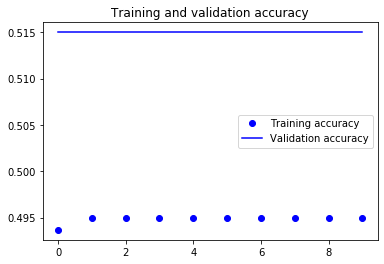

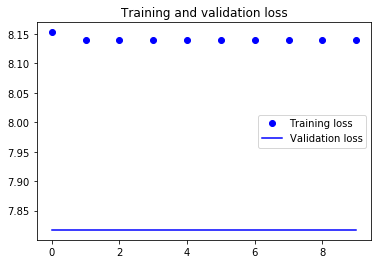

In [39]:
# Plot results
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
model_loss, model_accuracy = cnn1.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

7.817276390075683 0.515


In [37]:
cnn1_no_drop = Sequential()
cnn1_no_drop.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn1_no_drop.add(MaxPooling2D(pool_size=(2,2)))
cnn1_no_drop.add(Flatten())
cnn1_no_drop.add(Dense(128, activation="relu"))
cnn1_no_drop.add(Dense(2, activation="softmax"))

cnn1_no_drop.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
history1_no_drop = cnn1_no_drop.fit(trainX, trainY, validation_data=(testX, testY),
         #batch_size=250,
        # verbose=1,
         epochs=10)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - ETA: 4:02 - loss: 8.5627 - acc: 0.468 - ETA: 2:16 - loss: 7.0517 - acc: 0.562 - ETA: 1:40 - loss: 8.0590 - acc: 0.500 - ETA: 1:22 - loss: 7.9331 - acc: 0.507 - ETA: 1:11 - loss: 8.2605 - acc: 0.487 - ETA: 1:04 - loss: 8.5627 - acc: 0.468 - ETA: 59s - loss: 8.8506 - acc: 0.450 - ETA: 55s - loss: 8.7516 - acc: 0.45 - ETA: 51s - loss: 8.5068 - acc: 0.47 - ETA: 49s - loss: 8.4116 - acc: 0.47 - ETA: 46s - loss: 8.4712 - acc: 0.47 - ETA: 45s - loss: 8.3948 - acc: 0.47 - ETA: 43s - loss: 8.5627 - acc: 0.46 - ETA: 41s - loss: 8.4548 - acc: 0.47 - ETA: 40s - loss: 8.3948 - acc: 0.47 - ETA: 39s - loss: 8.4683 - acc: 0.47 - ETA: 38s - loss: 8.5924 - acc: 0.46 - ETA: 37s - loss: 8.6467 - acc: 0.46 - ETA: 36s - loss: 8.6423 - acc: 0.46 - ETA: 35s - loss: 8.5124 - acc: 0.47 - ETA: 34s - loss: 8.6107 - acc: 0.46 - ETA: 33s - loss: 8.6085 - acc: 0.46 - ETA: 32s - loss: 8.7160 - acc: 0.45 - ETA: 31s 

3000/3000 [==============================] - ETA: 34s - loss: 5.0369 - acc: 0.68 - ETA: 33s - loss: 6.7998 - acc: 0.57 - ETA: 32s - loss: 6.7159 - acc: 0.58 - ETA: 32s - loss: 6.9257 - acc: 0.57 - ETA: 32s - loss: 6.8502 - acc: 0.57 - ETA: 32s - loss: 7.2196 - acc: 0.55 - ETA: 31s - loss: 7.3395 - acc: 0.54 - ETA: 31s - loss: 7.6183 - acc: 0.52 - ETA: 31s - loss: 7.4994 - acc: 0.53 - ETA: 30s - loss: 7.6561 - acc: 0.52 - ETA: 30s - loss: 7.8759 - acc: 0.51 - ETA: 29s - loss: 7.8072 - acc: 0.51 - ETA: 29s - loss: 7.8266 - acc: 0.51 - ETA: 29s - loss: 7.8792 - acc: 0.51 - ETA: 28s - loss: 7.9583 - acc: 0.50 - ETA: 28s - loss: 7.9331 - acc: 0.50 - ETA: 28s - loss: 7.9998 - acc: 0.50 - ETA: 27s - loss: 8.0311 - acc: 0.50 - ETA: 27s - loss: 8.1916 - acc: 0.49 - ETA: 27s - loss: 8.1346 - acc: 0.49 - ETA: 26s - loss: 8.1550 - acc: 0.49 - ETA: 26s - loss: 8.1506 - acc: 0.49 - ETA: 25s - loss: 8.0590 - acc: 0.50 - ETA: 25s - loss: 8.1010 - acc: 0.49 - ETA: 25s - loss: 8.0993 - acc: 0.49 - ETA: 

3000/3000 [==============================] - ETA: 32s - loss: 8.5627 - acc: 0.46 - ETA: 32s - loss: 7.0517 - acc: 0.56 - ETA: 31s - loss: 7.7233 - acc: 0.52 - ETA: 31s - loss: 8.1850 - acc: 0.49 - ETA: 31s - loss: 8.0590 - acc: 0.50 - ETA: 30s - loss: 7.9751 - acc: 0.50 - ETA: 30s - loss: 7.8432 - acc: 0.51 - ETA: 30s - loss: 7.9331 - acc: 0.50 - ETA: 29s - loss: 8.0590 - acc: 0.50 - ETA: 29s - loss: 8.0590 - acc: 0.50 - ETA: 29s - loss: 8.1048 - acc: 0.49 - ETA: 28s - loss: 8.0171 - acc: 0.50 - ETA: 28s - loss: 8.0978 - acc: 0.49 - ETA: 28s - loss: 8.1310 - acc: 0.49 - ETA: 27s - loss: 8.1598 - acc: 0.49 - ETA: 27s - loss: 8.1850 - acc: 0.49 - ETA: 27s - loss: 8.1479 - acc: 0.49 - ETA: 26s - loss: 8.2549 - acc: 0.48 - ETA: 26s - loss: 8.2446 - acc: 0.48 - ETA: 25s - loss: 8.2605 - acc: 0.48 - ETA: 25s - loss: 8.2509 - acc: 0.48 - ETA: 25s - loss: 8.3567 - acc: 0.48 - ETA: 24s - loss: 8.3875 - acc: 0.47 - ETA: 24s - loss: 8.4368 - acc: 0.47 - ETA: 24s - loss: 8.5627 - acc: 0.46 - ETA: 

3000/3000 [==============================] - ETA: 39s - loss: 7.0517 - acc: 0.56 - ETA: 38s - loss: 6.2961 - acc: 0.60 - ETA: 38s - loss: 6.8838 - acc: 0.57 - ETA: 38s - loss: 6.4221 - acc: 0.60 - ETA: 38s - loss: 6.9509 - acc: 0.56 - ETA: 36s - loss: 7.1356 - acc: 0.55 - ETA: 35s - loss: 7.1236 - acc: 0.55 - ETA: 35s - loss: 6.9257 - acc: 0.57 - ETA: 34s - loss: 7.2196 - acc: 0.55 - ETA: 33s - loss: 7.2531 - acc: 0.55 - ETA: 33s - loss: 7.3722 - acc: 0.54 - ETA: 33s - loss: 7.3035 - acc: 0.54 - ETA: 32s - loss: 7.3229 - acc: 0.54 - ETA: 32s - loss: 7.4834 - acc: 0.53 - ETA: 32s - loss: 7.4546 - acc: 0.53 - ETA: 31s - loss: 7.3350 - acc: 0.54 - ETA: 31s - loss: 7.3183 - acc: 0.54 - ETA: 30s - loss: 7.2196 - acc: 0.55 - ETA: 30s - loss: 7.2637 - acc: 0.54 - ETA: 29s - loss: 7.2280 - acc: 0.55 - ETA: 28s - loss: 7.3635 - acc: 0.54 - ETA: 28s - loss: 7.3722 - acc: 0.54 - ETA: 27s - loss: 7.4678 - acc: 0.53 - ETA: 27s - loss: 7.4294 - acc: 0.53 - ETA: 27s - loss: 7.4345 - acc: 0.53 - ETA: 

3000/3000 [==============================] - ETA: 42s - loss: 9.0664 - acc: 0.43 - ETA: 38s - loss: 8.3109 - acc: 0.48 - ETA: 35s - loss: 8.7306 - acc: 0.45 - ETA: 34s - loss: 8.4368 - acc: 0.47 - ETA: 33s - loss: 8.9657 - acc: 0.44 - ETA: 33s - loss: 8.8146 - acc: 0.45 - ETA: 32s - loss: 8.2749 - acc: 0.48 - ETA: 32s - loss: 8.3109 - acc: 0.48 - ETA: 31s - loss: 8.1150 - acc: 0.49 - ETA: 31s - loss: 8.0087 - acc: 0.50 - ETA: 30s - loss: 8.2422 - acc: 0.48 - ETA: 30s - loss: 8.2269 - acc: 0.48 - ETA: 29s - loss: 8.2528 - acc: 0.48 - ETA: 29s - loss: 8.2389 - acc: 0.48 - ETA: 28s - loss: 8.2941 - acc: 0.48 - ETA: 28s - loss: 8.2479 - acc: 0.48 - ETA: 28s - loss: 8.0887 - acc: 0.49 - ETA: 27s - loss: 8.1150 - acc: 0.49 - ETA: 27s - loss: 8.1916 - acc: 0.49 - ETA: 26s - loss: 8.1850 - acc: 0.49 - ETA: 26s - loss: 8.1790 - acc: 0.49 - ETA: 26s - loss: 8.1735 - acc: 0.49 - ETA: 25s - loss: 8.0809 - acc: 0.49 - ETA: 25s - loss: 8.1010 - acc: 0.49 - ETA: 25s - loss: 8.0792 - acc: 0.49 - ETA: 

In [38]:
model_loss, model_accuracy = cnn1_no_drop.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

8.300819160461426 0.485


In [27]:
# Now with 3 convolutional layers
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation="relu"))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(2, activation="softmax"))

cnn3.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [28]:
history2 = cnn3.fit(trainX, trainY, validation_data=(testX, testY),
         batch_size=256,
         verbose=1,
         epochs=10)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - ETA: 50s - loss: 7.9842 - acc: 0.45 - ETA: 37s - loss: 7.8642 - acc: 0.48 - ETA: 31s - loss: 7.9712 - acc: 0.48 - ETA: 27s - loss: 7.6468 - acc: 0.51 - ETA: 23s - loss: 7.7545 - acc: 0.50 - ETA: 19s - loss: 7.8052 - acc: 0.50 - ETA: 16s - loss: 7.7785 - acc: 0.51 - ETA: 12s - loss: 7.8529 - acc: 0.50 - ETA: 9s - loss: 7.8339 - acc: 0.5082 - ETA: 5s - loss: 7.8312 - acc: 0.509 - ETA: 2s - loss: 7.9092 - acc: 0.504 - 43s 14ms/step - loss: 7.9291 - acc: 0.5037 - val_loss: 8.3008 - val_acc: 0.4850
Epoch 2/10
3000/3000 [==============================] - ETA: 33s - loss: 8.1850 - acc: 0.49 - ETA: 30s - loss: 7.9961 - acc: 0.50 - ETA: 26s - loss: 7.9751 - acc: 0.50 - ETA: 23s - loss: 8.0591 - acc: 0.50 - ETA: 20s - loss: 8.0842 - acc: 0.49 - ETA: 17s - loss: 8.1010 - acc: 0.49 - ETA: 14s - loss: 7.9421 - acc: 0.50 - ETA: 11s - loss: 7.9725 - acc: 0.50 - ETA: 8s - loss: 7.9751 - acc: 0.5052 

In [29]:
model_loss, model_accuracy = cnn3.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

8.300819160461426 0.485


In [35]:
plot_model(cnn3, to_file="cnn3.png")

In [31]:
# VGG-like Model Time
conv3 = partial(layers.Conv2D,
               kernel_size=3,
               strides=1,
               padding="same",
               activation="relu")
def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block
def _vgg(in_shape=(img_size,img_size, 3),
        n_classes=1000,
        opt="sgd",
        n_stages_per_blocks = [2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)

    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    preds = layers.Dense(2, activation='softmax')(dense2)

    vgglike = Model(in_layer, preds)
    vgglike.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return vgglike

def vgg16(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])

if __name__ == '__main__':
    vgglike = vgg19()
    print(vgglike.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 120, 120, 64)      1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 128)       0         
__________

In [32]:
# Compile model using accuracy to measure model performance
vgglike.compile(optimizer="adam", loss="categorical_crossentropy",
             metrics=["accuracy"])

In [33]:
vgglike.fit(trainX, trainY, validation_data=(testX, testY), epochs=10)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - ETA: 18:14 - loss: 0.6905 - acc: 0.65 - ETA: 15:28 - loss: 3.6193 - acc: 0.62 - ETA: 14:24 - loss: 4.9313 - acc: 0.59 - ETA: 13:49 - loss: 5.7132 - acc: 0.57 - ETA: 13:25 - loss: 5.6787 - acc: 0.58 - ETA: 13:06 - loss: 5.6557 - acc: 0.59 - ETA: 12:51 - loss: 5.8551 - acc: 0.59 - ETA: 12:36 - loss: 6.3824 - acc: 0.56 - ETA: 12:24 - loss: 6.5128 - acc: 0.56 - ETA: 12:12 - loss: 6.7178 - acc: 0.55 - ETA: 12:01 - loss: 6.7939 - acc: 0.55 - ETA: 11:50 - loss: 6.9833 - acc: 0.54 - ETA: 11:40 - loss: 7.1435 - acc: 0.53 - ETA: 11:30 - loss: 7.3169 - acc: 0.52 - ETA: 11:20 - loss: 7.4335 - acc: 0.51 - ETA: 11:10 - loss: 7.5356 - acc: 0.51 - ETA: 11:00 - loss: 7.5071 - acc: 0.51 - ETA: 10:51 - loss: 7.5098 - acc: 0.51 - ETA: 10:42 - loss: 7.5652 - acc: 0.51 - ETA: 10:33 - loss: 7.6654 - acc: 0.50 - ETA: 10:23 - loss: 7.8041 - acc: 0.50 - ETA: 10:15 - loss: 7.7241 - acc: 0.50 - ETA: 10:06 - los

3000/3000 [==============================] - ETA: 13:35 - loss: 9.0664 - acc: 0.43 - ETA: 13:35 - loss: 8.0590 - acc: 0.50 - ETA: 13:28 - loss: 7.8912 - acc: 0.51 - ETA: 13:20 - loss: 8.3109 - acc: 0.48 - ETA: 13:11 - loss: 7.8576 - acc: 0.51 - ETA: 13:03 - loss: 7.7233 - acc: 0.52 - ETA: 12:55 - loss: 7.7712 - acc: 0.51 - ETA: 12:49 - loss: 7.8072 - acc: 0.51 - ETA: 12:40 - loss: 7.5554 - acc: 0.53 - ETA: 12:32 - loss: 7.9583 - acc: 0.50 - ETA: 12:24 - loss: 7.7843 - acc: 0.51 - ETA: 12:15 - loss: 7.7652 - acc: 0.51 - ETA: 12:05 - loss: 7.9428 - acc: 0.50 - ETA: 11:55 - loss: 8.0231 - acc: 0.50 - ETA: 11:44 - loss: 7.9919 - acc: 0.50 - ETA: 11:34 - loss: 7.9961 - acc: 0.50 - ETA: 11:23 - loss: 8.1479 - acc: 0.49 - ETA: 11:13 - loss: 8.0870 - acc: 0.49 - ETA: 11:04 - loss: 8.0060 - acc: 0.50 - ETA: 10:54 - loss: 7.9331 - acc: 0.50 - ETA: 10:43 - loss: 7.8672 - acc: 0.51 - ETA: 10:33 - loss: 7.8530 - acc: 0.51 - ETA: 10:24 - loss: 7.8182 - acc: 0.51 - ETA: 10:14 - loss: 7.8492 - acc: 0.

3000/3000 [==============================] - ETA: 13:01 - loss: 7.5554 - acc: 0.53 - ETA: 12:56 - loss: 7.3035 - acc: 0.54 - ETA: 12:49 - loss: 7.3875 - acc: 0.54 - ETA: 12:39 - loss: 8.0590 - acc: 0.50 - ETA: 12:31 - loss: 7.3539 - acc: 0.54 - ETA: 12:23 - loss: 7.2196 - acc: 0.55 - ETA: 12:14 - loss: 7.1956 - acc: 0.55 - ETA: 12:06 - loss: 7.3035 - acc: 0.54 - ETA: 11:56 - loss: 7.4994 - acc: 0.53 - ETA: 11:47 - loss: 7.4043 - acc: 0.54 - ETA: 11:39 - loss: 7.4180 - acc: 0.53 - ETA: 11:30 - loss: 7.5554 - acc: 0.53 - ETA: 11:22 - loss: 7.7491 - acc: 0.51 - ETA: 11:13 - loss: 7.7712 - acc: 0.51 - ETA: 11:05 - loss: 7.7904 - acc: 0.51 - ETA: 10:57 - loss: 7.9331 - acc: 0.50 - ETA: 10:48 - loss: 7.7035 - acc: 0.52 - ETA: 10:40 - loss: 7.6673 - acc: 0.52 - ETA: 10:31 - loss: 7.6349 - acc: 0.52 - ETA: 10:23 - loss: 7.6813 - acc: 0.52 - ETA: 10:15 - loss: 7.5314 - acc: 0.53 - ETA: 10:06 - loss: 7.6011 - acc: 0.52 - ETA: 9:58 - loss: 7.6430 - acc: 0.5258 - ETA: 9:49 - loss: 7.7023 - acc: 0.

3000/3000 [==============================] - ETA: 13:02 - loss: 6.5480 - acc: 0.59 - ETA: 12:52 - loss: 6.2961 - acc: 0.60 - ETA: 12:41 - loss: 7.3875 - acc: 0.54 - ETA: 12:33 - loss: 7.5554 - acc: 0.53 - ETA: 12:25 - loss: 8.1598 - acc: 0.49 - ETA: 12:18 - loss: 7.9751 - acc: 0.50 - ETA: 12:11 - loss: 7.6993 - acc: 0.52 - ETA: 12:04 - loss: 8.1220 - acc: 0.49 - ETA: 11:56 - loss: 8.1150 - acc: 0.49 - ETA: 11:47 - loss: 8.1094 - acc: 0.49 - ETA: 11:40 - loss: 8.0590 - acc: 0.50 - ETA: 11:31 - loss: 8.1010 - acc: 0.49 - ETA: 11:23 - loss: 8.0978 - acc: 0.49 - ETA: 11:14 - loss: 7.9871 - acc: 0.50 - ETA: 11:06 - loss: 8.0255 - acc: 0.50 - ETA: 10:57 - loss: 7.9646 - acc: 0.50 - ETA: 10:58 - loss: 7.9109 - acc: 0.50 - ETA: 10:51 - loss: 7.9471 - acc: 0.50 - ETA: 10:42 - loss: 7.8470 - acc: 0.51 - ETA: 10:33 - loss: 7.7316 - acc: 0.52 - ETA: 10:23 - loss: 7.6993 - acc: 0.52 - ETA: 10:14 - loss: 7.7156 - acc: 0.52 - ETA: 10:05 - loss: 7.6868 - acc: 0.52 - ETA: 9:56 - loss: 7.7023 - acc: 0.5

3000/3000 [==============================] - ETA: 12:55 - loss: 5.0369 - acc: 0.68 - ETA: 12:41 - loss: 6.0443 - acc: 0.62 - ETA: 12:34 - loss: 7.5554 - acc: 0.53 - ETA: 12:28 - loss: 7.8072 - acc: 0.51 - ETA: 12:19 - loss: 7.5554 - acc: 0.53 - ETA: 12:11 - loss: 7.7233 - acc: 0.52 - ETA: 12:02 - loss: 7.6993 - acc: 0.52 - ETA: 11:55 - loss: 7.7442 - acc: 0.51 - ETA: 11:47 - loss: 7.6673 - acc: 0.52 - ETA: 11:40 - loss: 7.7065 - acc: 0.52 - ETA: 11:32 - loss: 7.7843 - acc: 0.51 - ETA: 11:23 - loss: 7.7652 - acc: 0.51 - ETA: 11:15 - loss: 7.7491 - acc: 0.51 - ETA: 11:06 - loss: 7.7352 - acc: 0.52 - ETA: 10:58 - loss: 7.8240 - acc: 0.51 - ETA: 10:50 - loss: 7.7757 - acc: 0.51 - ETA: 10:41 - loss: 7.7331 - acc: 0.52 - ETA: 10:33 - loss: 7.8352 - acc: 0.51 - ETA: 10:24 - loss: 7.9530 - acc: 0.50 - ETA: 10:16 - loss: 7.8828 - acc: 0.51 - ETA: 10:08 - loss: 7.8192 - acc: 0.51 - ETA: 10:00 - loss: 7.7843 - acc: 0.51 - ETA: 9:51 - loss: 7.7525 - acc: 0.5190 - ETA: 9:43 - loss: 7.8072 - acc: 0.

In [34]:
model_loss, model_accuracy = vgglike.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

8.300819160461426 0.485


In [36]:
plot_model(vgglike, to_file="vgglike.png")